In [ ]:
!pip install missingno # missingno 설치 작업

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 시각화 도구
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 프로세스
1. 널데이터 정제
2. feature 개별 분석, feature간 상관관계 확인 -> 시각화 툴 활용
3. feature engineering - 모델 성능을 높이기 위한 과정
4. model 만들기 - sklearn을 사용해 모델 생성
5. 모델 학습 및 예측


In [2]:
df_train = pd.read_csv('C:/python_directory/titanic/train.csv')
df_test = pd.read_csv('C:/python_directory/titanic/test.csv')

In [11]:
df_train.info() # 데이터 프레임 기본 정보 확인(데이터 타입확인 가능)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
df_train.describe() # feature가 가진 통계치를 반환
# Null data존재하는 게 보임! 시각화로 확인해보자

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe() # test set에는 타겟 변수인 survived가 빠져있음

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check - using visuallization tool

In [23]:
for col in df_train.columns :
    msg = 'column : {:>11}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
# age(20%) cabin(80%) 로 결측치가 많음..!

column : PassengerId	 Percent of NaN value : 0.00%
column :    Survived	 Percent of NaN value : 0.00%
column :      Pclass	 Percent of NaN value : 0.00%
column :        Name	 Percent of NaN value : 0.00%
column :         Sex	 Percent of NaN value : 0.00%
column :         Age	 Percent of NaN value : 19.87%
column :       SibSp	 Percent of NaN value : 0.00%
column :       Parch	 Percent of NaN value : 0.00%
column :      Ticket	 Percent of NaN value : 0.00%
column :        Fare	 Percent of NaN value : 0.00%
column :       Cabin	 Percent of NaN value : 77.10%
column :    Embarked	 Percent of NaN value : 0.22%


In [25]:
for col in df_test.columns :
    msg = 'column: {:>11}\t percent of NaN value : {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value : 0.00%
column:      Pclass	 percent of NaN value : 0.00%
column:        Name	 percent of NaN value : 0.00%
column:         Sex	 percent of NaN value : 0.00%
column:         Age	 percent of NaN value : 20.57%
column:       SibSp	 percent of NaN value : 0.00%
column:       Parch	 percent of NaN value : 0.00%
column:      Ticket	 percent of NaN value : 0.00%
column:        Fare	 percent of NaN value : 0.24%
column:       Cabin	 percent of NaN value : 78.23%
column:    Embarked	 percent of NaN value : 0.00%


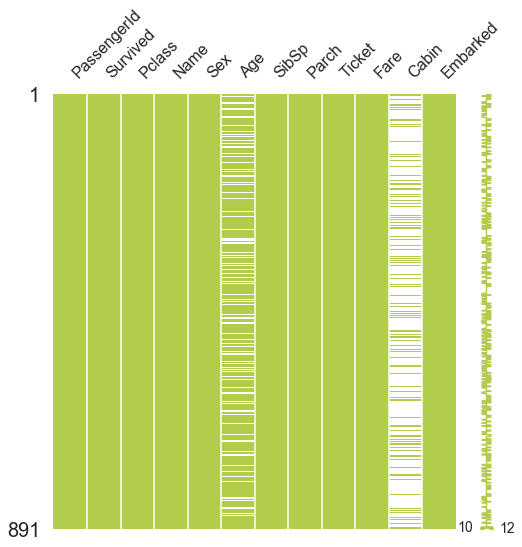

In [38]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.7, 0.8, 0.3))

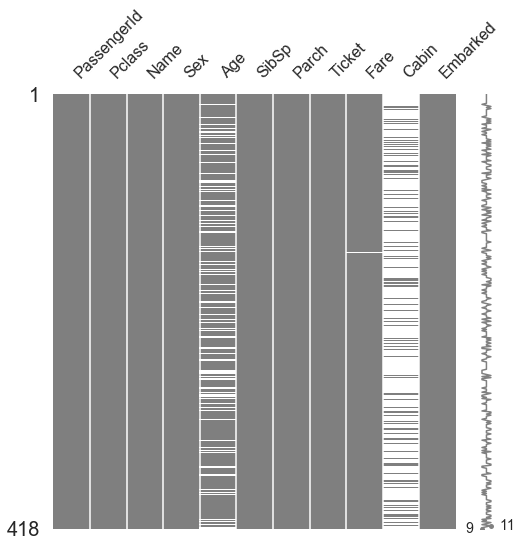

In [39]:
msno.matrix(df = df_test.iloc[:,:], figsize=(8,8), color=(0.5,0.5,0.5))

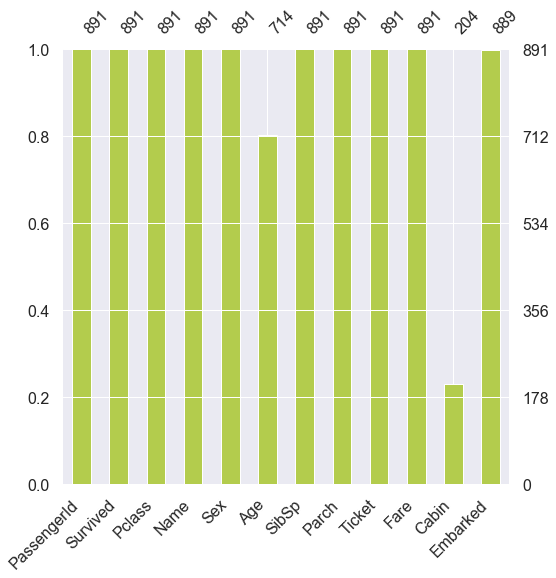

In [45]:
# bar차트로 확인하기 - 결측치가 아닌 것들을 세줌
msno.bar(df = df_train.iloc[:,:], figsize=(8,8), color=(0.7, 0.8, 0.3))

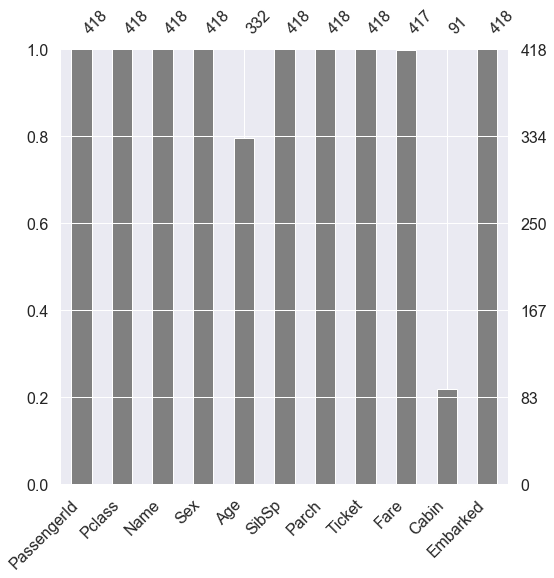

In [41]:
msno.bar(df = df_test.iloc[:,:], figsize=(8,8), color=(0.5,0.5,0.5))

## 1.2 Target lable check - distribution check
이 문제의 경우 타겟 값이 Binary Classification -> 1,0 분포에 따라 모델의 평가 방법이 달라질 수 있음

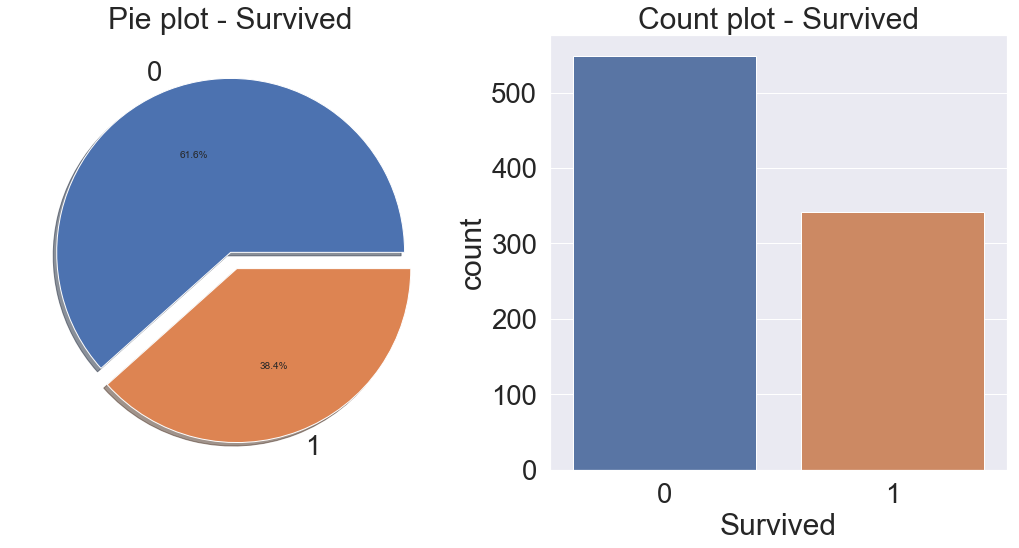

In [82]:
f, ax = plt.subplots(1,2, figsize=(18, 8)) # 그래프 그려줄 화면 분할

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# ax=ax[0] : 위에서 분할한 화면중에 0번째 즉, 왼쪽에 그래프를 그려라
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. Explorary data analysis
적절한 시각화를 통한 데이터 분석
주로 사용되는 시각화 라이브러리 : matplotlib, seaborn, plotly etc.

## 2.1 Pcalss
- ordinal, 서수형 데이터 (카테고리면서 순서가 있는 타입)

In [59]:
# pclass에 따른 생존률 차이 살펴보기 - 엑셀에서의 피벗테이블과 비슷한 작업
# pandas에서는 groupby를 사용
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count() 
# count()를 사용했으므로 각 클래스에 몇명의 승객이 있었는지 그 숫자를 세줌

,Survived
Pclass,
1,216
2,184
3,491


In [55]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()
# sum()을 사용해 각 Pclass에서 살아남은 승객의 수를 보여줌

,Survived
Pclass,
1,136
2,87
3,119


In [65]:
# 위의 과정을 좀 더 수월하게 보여줌
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='spring_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [66]:
# 각 클래스별로 생존률(%) 얻기 - mean() 이용
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


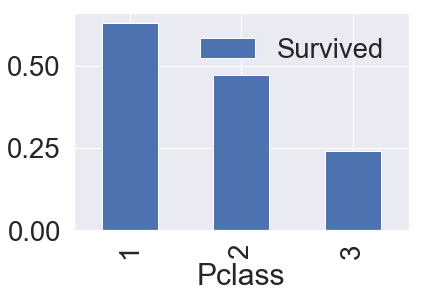

In [79]:
# 위의 내용 막대그래프로 보기
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

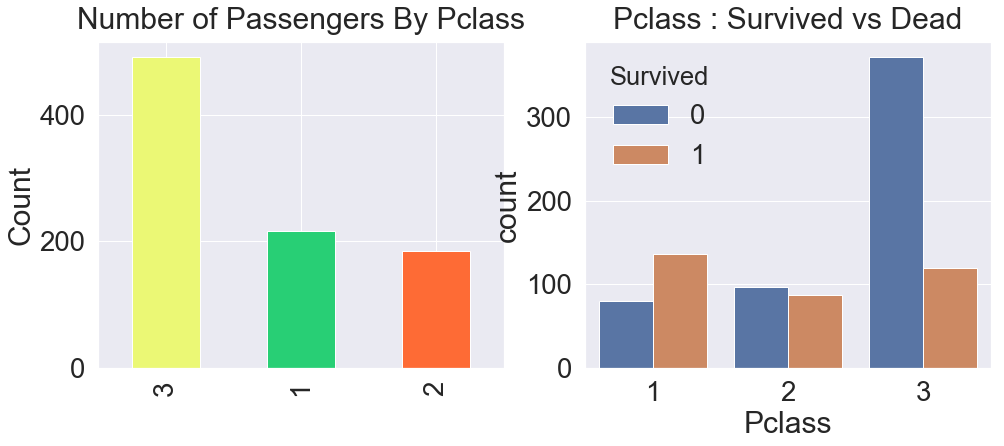

In [4]:
# seaborn의 countplot - 특정 label에 따른 개수 확인하기

y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(16,6))

df_train['Pclass'].value_counts().plot.bar(color=['#EBF875','#28CF75','#FE6B35'], ax=ax[0]) # 색상 지정은 RGB코드로 지정
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # hue : 색명 - Survived type에 따라 색상을 다르게 표현(분류도 이걸로 됨)하라는 뜻
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

## 2.2 sex

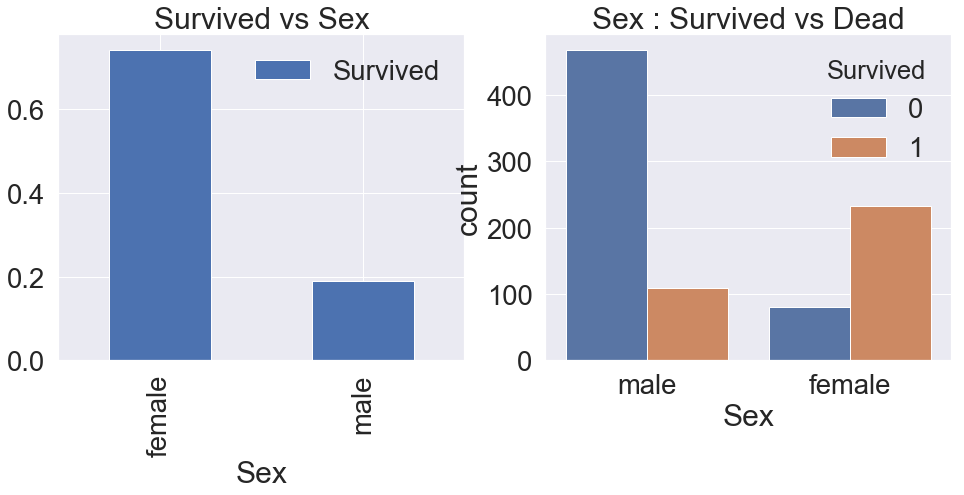

In [6]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) # 성별에 따른 생존 비율을 막대그래프로
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

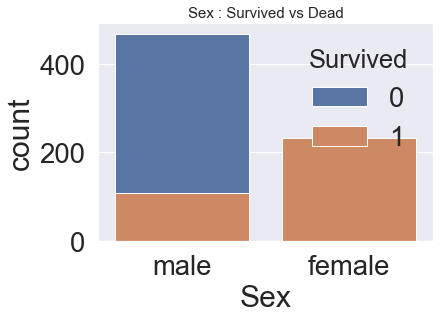

In [101]:
# 누적 그래프로 보고 싶은 경우 : dodge : false 옵션을 사용
ax=sns.countplot('Sex', hue='Survived', data=df_train, dodge=False)
ax.set_title("Sex : Survived vs Dead", size=15)
plt.show()

In [45]:
df_train[['Sex','Survived']].groupby(['Sex'],
                                     as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient('autumn_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass
- 두가지의 상관관계? / 두가지에 feature에 관해 생존이 어떻게 달라지는지 확인

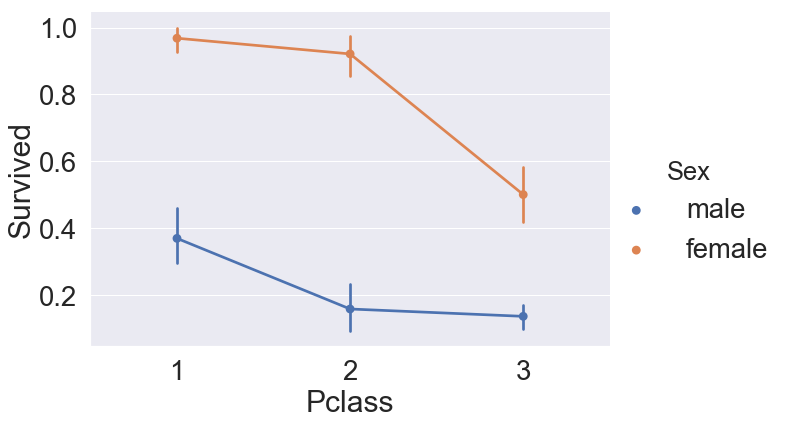

In [20]:
# seaborn의 factorplot을 이용 -> 3개의 차원으로 이뤄진 그래프 작성 가능
sns.factorplot('Pclass','Survived', hue='Sex', data = df_train,
              size=6, aspect=1.5)

# 모든 클래스에서 여성이 남성보다 살 확률 높음
# 성별에 상관없이 높은 클래스일 수록 살 확률 높음

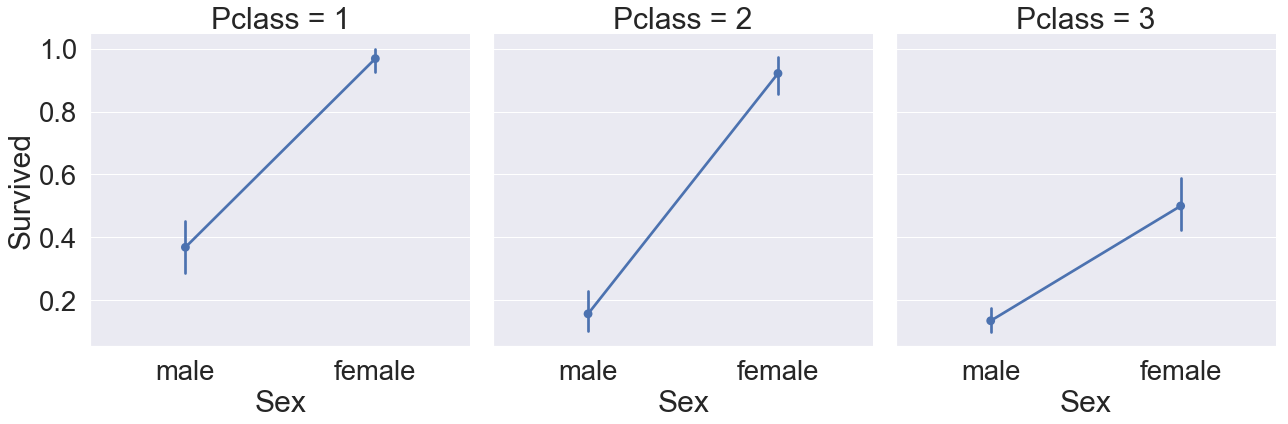

In [49]:
# countplot을 hue대신 column(코드에서는 col 옵션으로 사용됨)으로 설명하기
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, size=6, aspect=1)

## 2.4 Age

In [102]:
print('Youngest : {:.1f} Years'.format(df_train['Age'].min()))
print('Oldest : {:.1f} Years'.format(df_train['Age'].max()))
print('Mean : {:.1f} Years'.format(df_train['Age'].mean()))

Youngest : 0.4 Years
Oldest : 80.0 Years
Mean : 29.7 Years


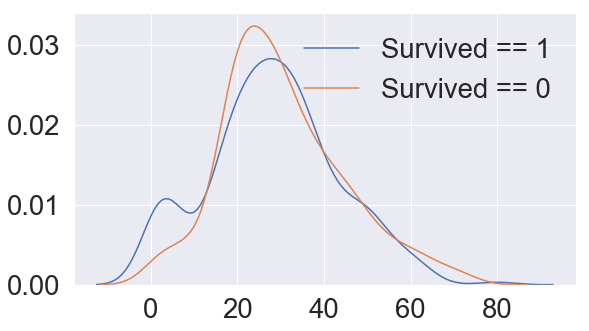

In [104]:
# 생존에 따른 Age histogram
fig, ax=plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) # df_train의 'Survived==1인 경우'의 데이터의 '나이'를 사용 
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax) # 위와 같은 ax에 중첩해서 그리기
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# 눈여겨 볼 부분 : 나이가 어린 생존자가 많음!!!

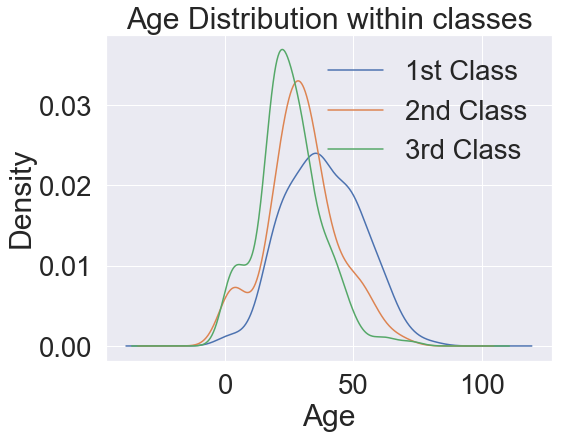

In [4]:
# Age distribution withing classes (클래스에 따른 연령대 분포)
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde') # kind kde :  Kernel Distribution Estimation Plot (밀도함수 그래프)
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# 전반적으로 클래스가 높을 수록 연령대가 높다. 

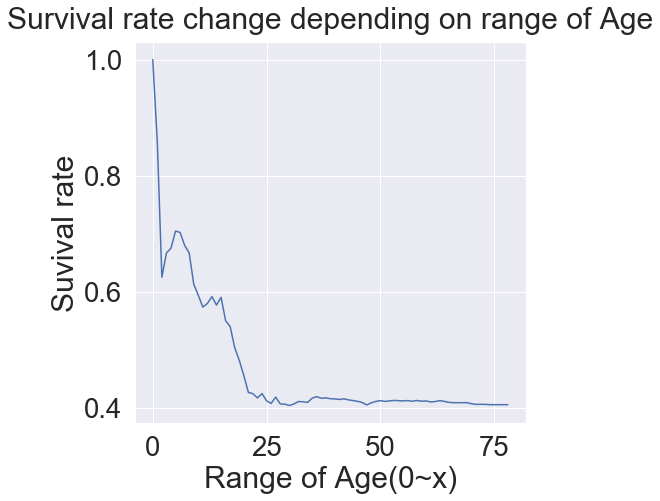

In [13]:
# 나이대가 변하면서 생존률이 어떻게 변하는지
cummulate_survival_ratio = [] # 결과를 담을 빈 리스트 생성
for i in range(1,80) :
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]))
    # 나이가 i 보다 적은 총 고객 중(누적) 살아남은 고객(survived=1인것만 sum)의 비율
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02) # 그래프에서 값을 어디까지 보여줄 것인지
plt.ylabel('Suvival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#20대 초중반으로 연령이 내려가면서 전체 생존률이 급감함 -> 나이도 생존 여부 예측에 중요한 feature로 사용가능

## 2.5 Pclass, Sex, Age
### seaborn의 violinplot : 여러변수 간의 상관관계를 보는데에 탁월함! 

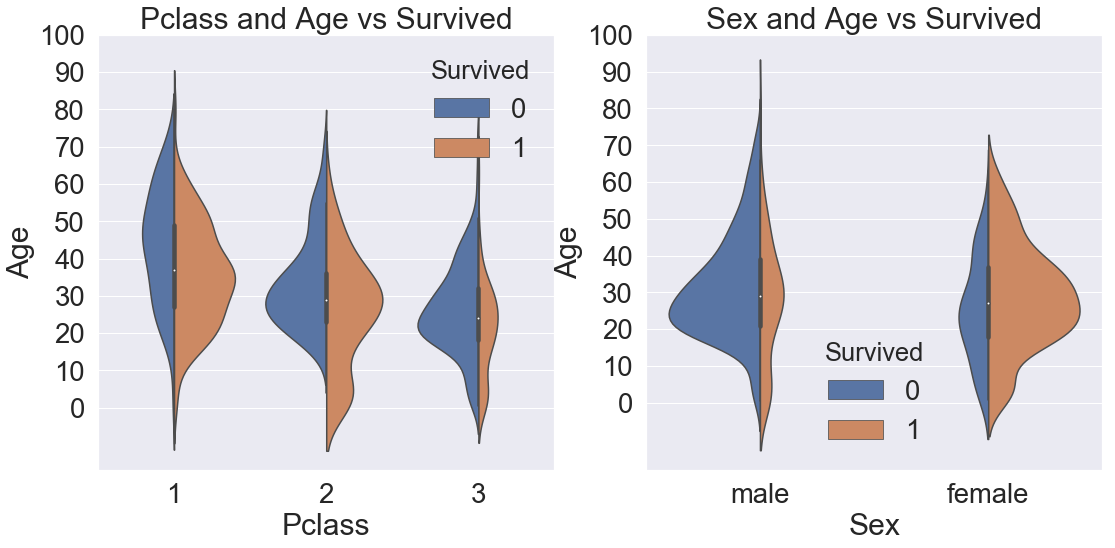

In [6]:
# x 축 : case(Placss, Sex)를 넣고, y축에는 distribution(Age) 를 넣어보자
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # y축에 표시될 범위를 0-100까지 10 단위

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 모든 클래스에서 연령대가 낮은 경우 생존률이 더 높음
# 여성이 남성보다 훨씬 생존율이 높음이 확인됨
# 여성과 아이를 먼저 챙겼다고 볼 수 있음

## 2.6 Embarked : 탑승 항구

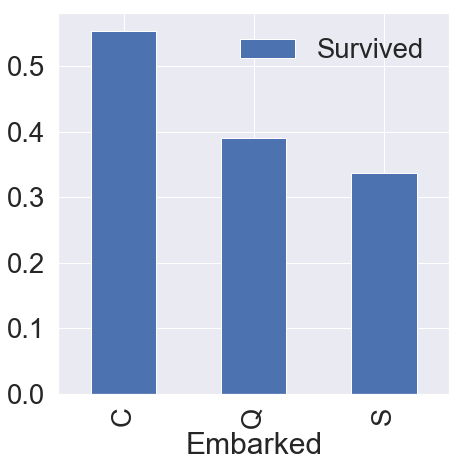

In [14]:
# 탑승한 항구에 따른 생존률
f,ax = plt.subplots(1,1, figsize=(7,7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax) # 사용할 데이터, 그룹을 지을 변수, 인덱스로 사용여부, 적용할 함수(1,0값이므로 mean해주면 비율나옴), 정렬기준 변수, 그래프 모양지정

# 항구별로 큰차이가 있다고 할 수 있는지 결론 내리기 힘듦 (일단 사용 예정)
# 눈에 띄는 것은 C항구에서 탑승한 경우 생존률이 좀 더 높아보임

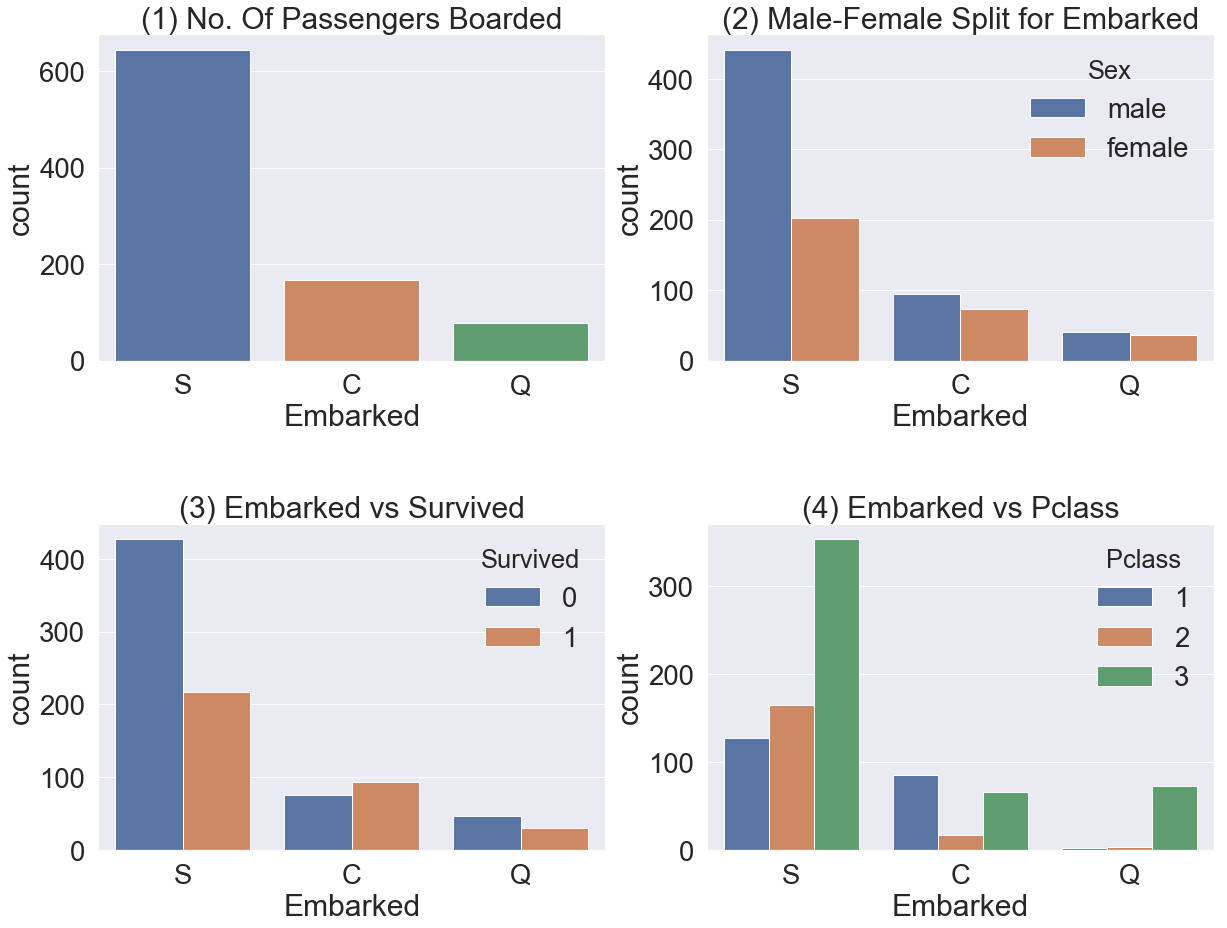

In [17]:
# 앞서 사용했던 변수들로 split해서 살펴 보자
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# S 항구에서 가장 많은 탑승객이 있었고, 그 중에서도 남성이 압도적으로 많이 탑승했음 -> 남성의 생존률이 낮기때문에 S 항구의 생존률도 자연히 낮게 나올 수밖에 없음!
# C 항구에서는 1 클래스의 고객이 많은 비중으로 탑승했고, 여성의 비율도 

## 2.7 Family - SibSp(형제자매) + Parch(부모, 자녀)
- 두 변수를 합쳐서 분석해 보자

In [3]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 형제자매 수 + 부모자녀 수 + 본인(1)
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

print("Maximum size of Family : ", df_train['FamilySize'].max())
print("Minimum size of Family : ", df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


In [5]:
df_train[['FamilySize', 'Parch', 'SibSp']].head()

,FamilySize,Parch,SibSp
0,2,0,1
1,2,0,1
2,1,0,0
3,2,0,1
4,1,0,0


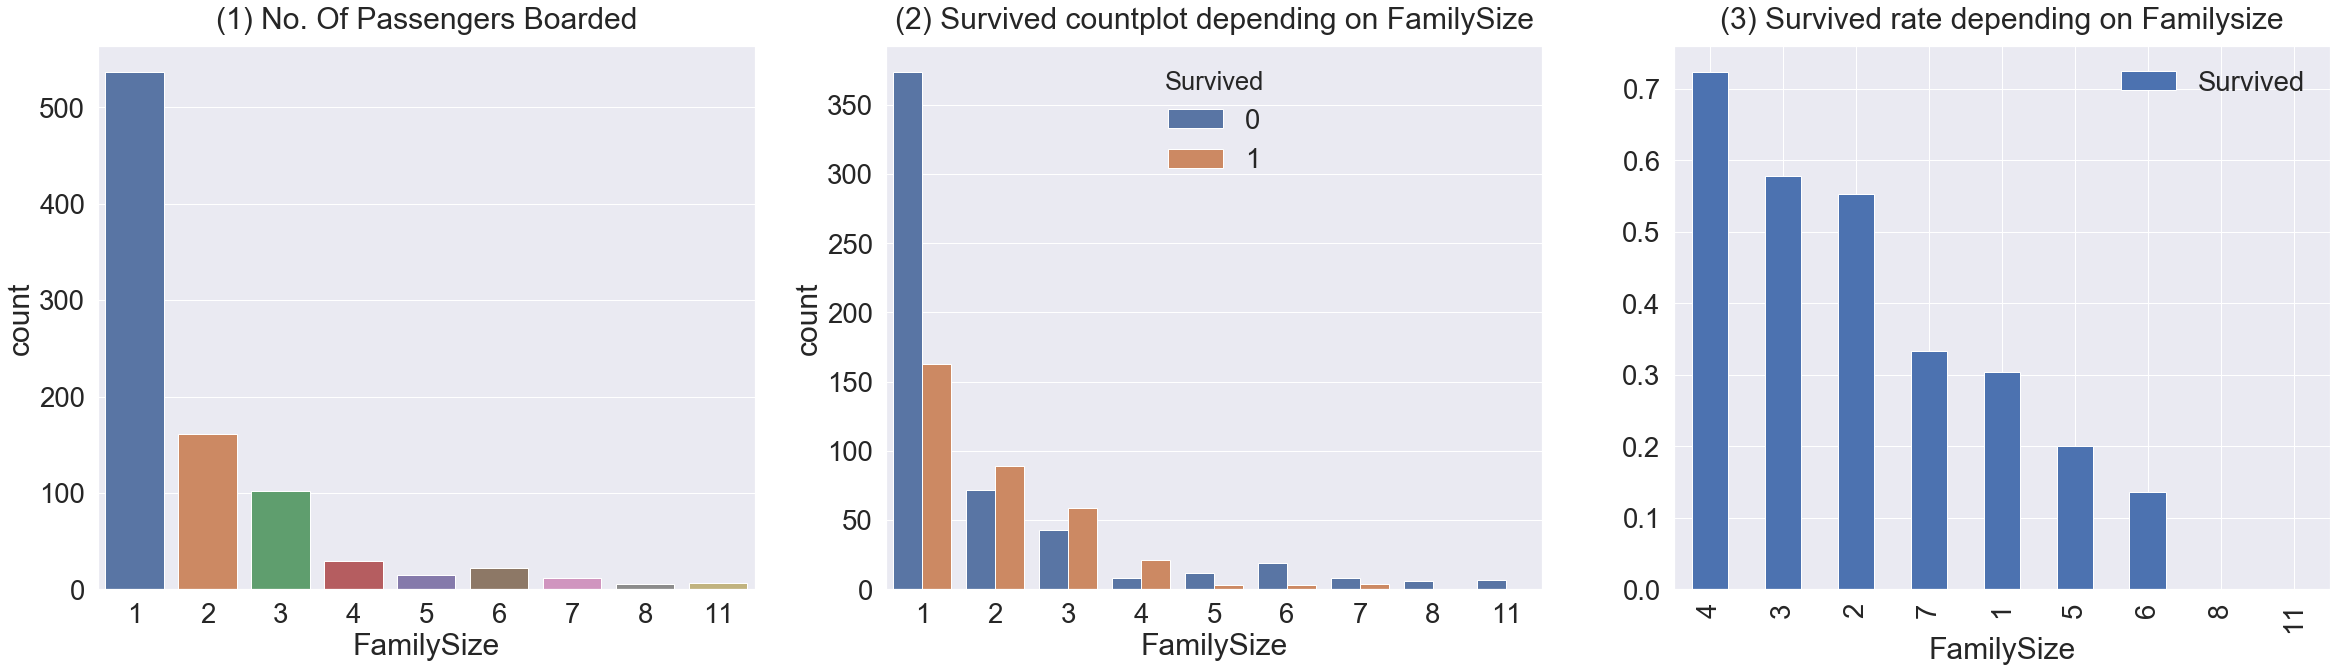

In [17]:
# Familysize와 생존의 관계 살펴보기
f, ax = plt.subplots(1,3, figsize=(40,10))

# countplot
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded", y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# bar plot
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Familysize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# (1) - 가족 수는 대부분 1명이고, 11명이 최대
# (2), (3) - 가족 수가 2-4명인 경우 생존한 경우가 더 많음(가족이 2-4명인 경우 아이가 포함되어있을 확률이 크기 때문인듯?) 또한 4명인 경우 생존 확률이 70퍼 센트 이상으로 가장 높음

## 2.8 Fare
- continuous feature

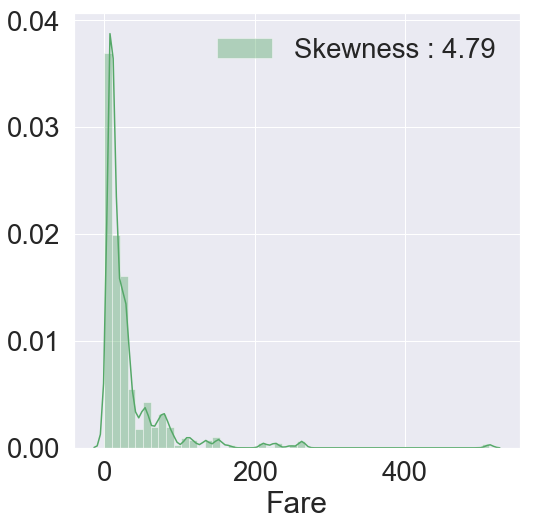

In [34]:
f, ax = plt.subplots(1,1, figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='g', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax) # displot : histogram with a line on it
g = g.legend(loc='best') # legend 위치 지정 : etc) center upper left, lower right .. 

In [35]:
#  매우 비대칭적인 분포를 바꾸기 위해서 log변환 수행 ( outlier의 영향 줄이기 위해서 )
# dataFrame의 특정칼럼에 공통작업을 수행하고 싶은 경우 사용할 수 있는 함수 : map, apply
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set의 null값을 평균치로 대체 - 위에서 살펴보면 train set에는 Fare에 NUll값 없고, test set에는 0.24%있음 따라서 처리 후 사용

# log변환 적용
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

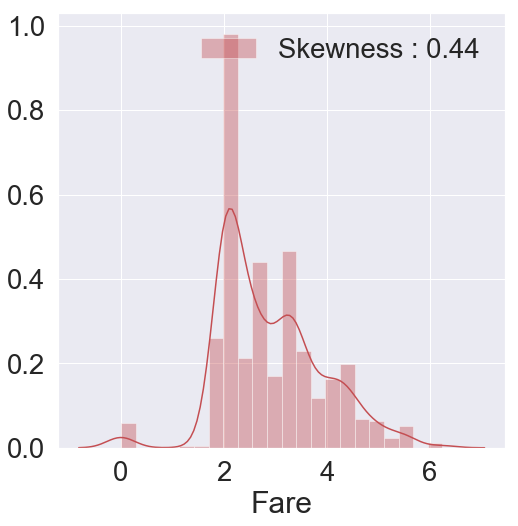

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='r', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

# 비대칭성이 많이 줄어들었음 ! : feature engineering에 들어가는 부분임

## 2.9 cabin
- NaN값이 77.1%에 달할 정도로 많다 => 모델에서 제외하자

In [41]:
df_train['Cabin'].head() # NaN값이 굉장히 많음

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [46]:
print('Cabin\t Percent of NaN value : {:.2f}%'.format(100*(df_train['Cabin'].isnull().sum() / df_train['Cabin'].shape[0])))

Cabin	 Percent of NaN value : 77.10%


## 2.10 Ticket

df_train['Ticket'].value_counts()

# 타이타닉 튜토리얼 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 시각화 도구
sns.set(font_scale=2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('C:/python_directory/titanic/train.csv')
df_test = pd.read_csv('C:/python_directory/titanic/test.csv')

# 튜토리얼 1에서 했던 전처리
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # 결측치 처리

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

## Featrue Engineering
## 3.1 FIll Null
- 결측치를 어떻게 채우는가는 모델의 성능에 영향을 많이끼치므로 신경써야함!
- 실제 모델에 학습시키기 위해 사용하는 것으로 test셋에도 같은 적용을 해줘야함 까먹지 말기!!!

### FIll Null in Age using title(Mrr, Miss, Mrs)

In [27]:
df_train['Age'].isnull().sum() # 결측치 수 177개

177

In [13]:
df_train['Name'].head() # 이름에 들어있는 Mr, Miss, Mrs와 같은 타이틀을 결측치 처리에 활용하자

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [3]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # 대소문자 상관없이 문자열 . (ex) Mr . )을 추출
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [29]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r') # 성별에 따른 Initial count보기

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [4]:
# 남녀 성별에 따른 Initial 분류해서 쓰기(위에 그래프 참고해서!)
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [22]:
df_train.groupby('Initial').mean()
# Miss / Mrs / Master가 생존률이 높다 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [27]:
df_test.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,3.112730,3.952381
Miss,1100.240506,2.443038,21.774844,0.544304,0.392405,2.927526,1.936709
Mr,1102.471074,2.309917,32.151351,0.272727,0.177686,2.744519,1.450413
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,3.566570,2.430556
Other,1053.500000,1.500000,42.750000,0.500000,0.250000,3.650053,1.750000


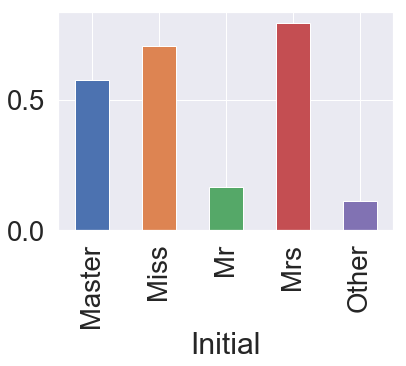

In [25]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()
# 'Initial'로 그룹지은 데이터 중 생존여부의 평균(=생존 비율을 막대차트로 그리자

In [5]:
# 본격적으로 Null값 채우기 - statistics를 활용하기
# loc + boolean(논리형) + column을 사용해 값을 치환하는 방식을 자주 사용함!
# 위에서 groupby로 살펴봤을 때 구해진 각 Initial의 평균 나이를 이용하고자함
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

# 이 경우 test set의 데이터도 test set의 평균값을 이용해 대체해줌

In [6]:
# 결측치 대체 완료
print(df_train['Age'].isnull().sum())
print(df_test['Age'].isnull().sum())

0
0


In [62]:
# 다른 캐글러의 전처리 방식(뭐가 더 좋을지 어떤 새로운 방식이 있을지는 생각해봐야함)
index_NaN_age = list(df_train["Age"][df_train["Age"].isnull()].index)
index_NaN_age

age_pred = df_train['Age'][((df_train['SibSp']==df_train.iloc[888]['SibSp'])&(df_train['Parch']==df_train.iloc[888]['Parch'])&(df_train['Pclass']==df_train.iloc[888]['Pclass']))].median()

print(age_pred)

print(df_train.loc[888,"Initial"])

13.5
Miss


### 3.1.2 Fill Null in Embarked

In [6]:
df_train['Embarked'].isnull().sum()
 # Embarked Null값은 두개

2

In [23]:
df_train[['PassengerId','Embarked']].groupby('Embarked').count()
# S 항구에서 탑승한 경우가 가장 많으므로 결측치 두개는 S항구에 편입시키자

,PassengerId
Embarked,
C,168
Q,77
S,644


In [7]:
# fillna를 사용해 대체해보자
df_train['Embarked'].fillna('S', inplace=True) # inplace 옵션을 사용하면 복사본을 만들지 않고 원본그대로를 변경한다.

In [8]:
# 결측치 대체된 것 확인됨
df_train['Embarked'].isnull().sum()

0

## 3.2 Change Age (continuous to categorical)

In [50]:
df_train.info()
# Age 현재 연속형 변수 -> 카테고리화 시킬 수 ㅇ (그룹화해서 사용 가능)
## 카테고리화의 단점 ) information loss가 생길 수 있다.
## 방법 ) loc를 사용해 직접하거나 apply 함수를 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
Initial        891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [9]:
# loc 을 사용해 categorical로 바꾸기 (10살 간격 이용) : for문으로 내가 짠 코드인데 시간이 오래걸림,,
for age in df_train['Age'] :
    if age < 10 :
        df_train.loc[df_train['Age'] < 10 , 'Age_Cat' ] = 0 
    else :
        for i in range(0,80,10) :
            df_train.loc[(i <= df_train['Age']) & (df_train['Age']<i+10) , 'Age_Cat' ] = i/10
        if age >= 80 :
            df_train['Age_Cat'] = 7

In [10]:
for age in df_test['Age'] :
    if age < 10 :
        df_test.loc[df_test['Age'] < 10 , 'Age_Cat' ] = 0 
    else :
        for i in range(0,80,10) :
            df_test.loc[(i <= df_test['Age']) & (df_test['Age']<i+10) , 'Age_Cat' ] = i/10
        if age >= 80 :
            df_test['Age_Cat'] = 7

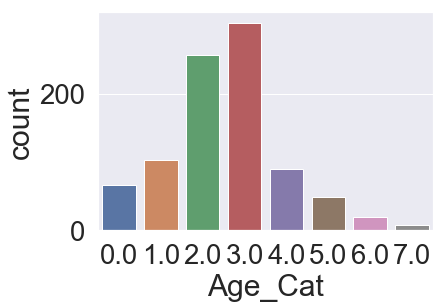

In [12]:
sns.countplot('Age_Cat', data=df_train)

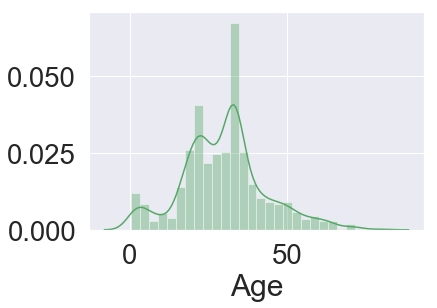

In [80]:
# 실제 분포(연속형 자료 상태일 때)
sns.distplot(df_train['Age'], color='g')

In [11]:
# apply 함수 사용하기
def category_age(x) :
    if x < 10 :
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    else:
        return 7

df_train['Age_Cat2'] = df_train['Age'].apply(category_age)

In [12]:
print('둘이 같은 결과? : ', (df_train['Age_Cat']==df_train['Age_Cat2']).all())

둘이 같은 결과? :  True


In [13]:
df_train.drop(['Age','Age_Cat2'], axis=1, inplace=True) # axis : 1 열 / 0 행
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Change Initial, Emabarked and Sex (string to numerical)
- 문자열로 이뤄진 범주는 컴퓨터가 인식할 수 있도록 수치화 시켜야함
- map method를 이용
- dictionary 형식 이용해서 mapping해보자

In [14]:
df_train[['Initial','PassengerId']].groupby('Initial').count()
 # Initiaㅣ 변수 현재 5개 범주로 이뤄져있음 -> 컴퓨터가 인식할 수 있도록 수치화 시켜야함

,PassengerId
Initial,
Master,40
Miss,186
Mr,529
Mrs,127
Other,9


In [14]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, "Miss" : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, "Miss" : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [15]:
df_train[['Initial','PassengerId']].groupby('Initial').count() # 바뀐 것 확인됨

,PassengerId
Initial,
0,40
1,186
2,529
3,127
4,9


In [19]:
# Embarked
# 각 법주별로 값이 몇개씩있는지 확인하는 방법 : value_counts !!
print(df_train['Embarked'].unique())
print(df_train['Embarked'].value_counts())

['S' 'C' 'Q']
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [16]:
# Embarked 바꿔주기
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, "Q" : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, "Q" : 1, 'S' : 2})

In [17]:
df_test['Embarked'].value_counts() # 변경된 것 확인

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [18]:
df_train['Embarked'].isnull().any() # any() : 하나라도 있으면 True를 반환함

False

In [28]:
# Sex 바꿔주기
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

In [20]:
df_train['Sex'].isnull().any()

False

#### 3.3.1 사용할 전체 feature간의 상관관계 보기 : Pearson Correlation (-1, 1) 
- hitmap plot을 이용 / corr() method, saborn을 이용

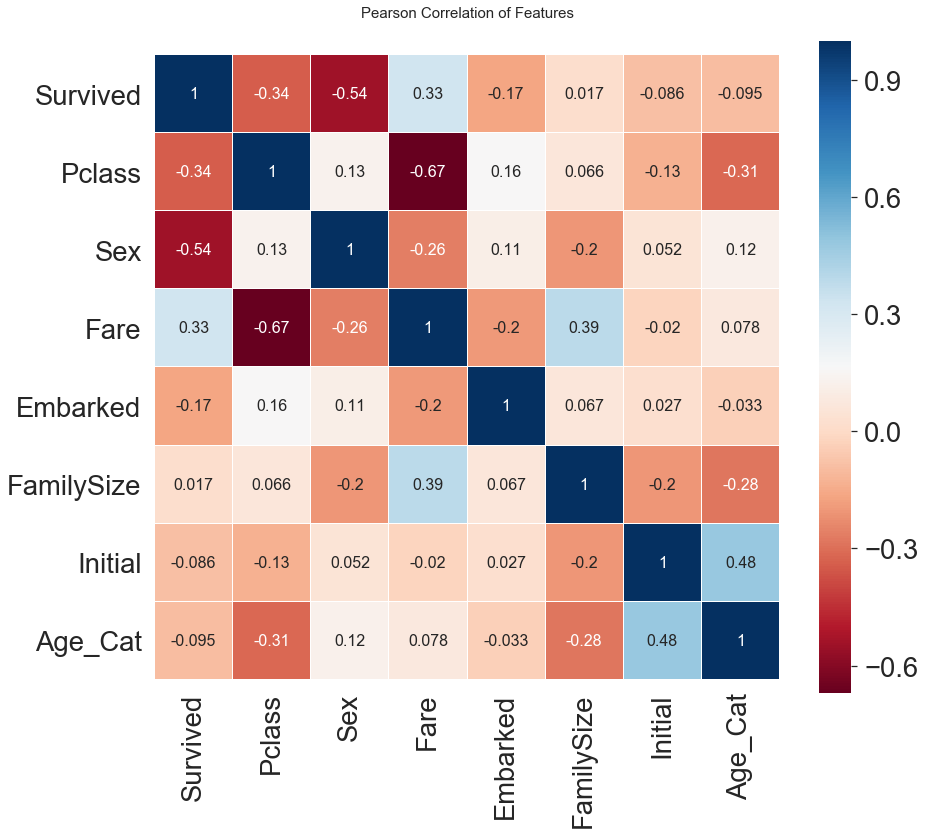

In [21]:
# 사전작업
heatmap_data = df_train[['Survived',"Pclass",'Sex','Fare','Embarked','FamilySize','Initial','Age_Cat']] # 사용할 데이터만 저장

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)

# 그래프 그리기
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, 
            vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={'size':16})
    # annot : 데이터값 표시여부 / cbar : 오른쪽의 컬러바 표시 여부

# 후작업
del heatmap_data # heatmap 그릴 때 외에는 필요없으로 사용후 삭제

# 해석
# 생존여부는 성별, 클래스와 상관관계가 있음
# Pclass와 Fare의 상관관계는 당연한것 : 클래스 높을 수록 가격이 비싸므로,,
# 수치적으로 너무 높은 상관관계를 가지는 feature들은 보이지않음 : 불플요한 feature가 따로 없음을 의미( 두 변수가 상관관계 너무 뚜렷하면 굳이 둘 다 사용할 필요 없음)

# 3.4 One-hot encoding on Initial and Embarked
- one-hot encoding : 모델의 성능을 높이기위해 수치화 시킨 카테고리 데이터에 대해 해주는 인코딩
- 카테고리 여부를 가로로 붙이는 것!! (우리 데이터에서 적용했던 것!)
- pd.get_dummies를 이용 : columns 100개 넘어가는경우(카테고리가 100개가 넘어가는 경우) 버벅거릴 수 있음 -> 다른 방법 사용ㅇ

In [22]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial') # prefix값을 기준으로 각 범주에 속하는지 여부를 Initial_# term으로 돌려서 더미변수를 만들어라
df_test = pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_Cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2.0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3.0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2.0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3.0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3.0,0,0,1,0,0


In [24]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'] ,prefix='Embarked')

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_Cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.057860,NaN,1,3.0,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.945910,NaN,2,4.0,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,2.270836,NaN,1,6.0,0,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2.159003,NaN,1,2.0,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2.508582,NaN,3,2.0,0,0,0,1,0,0,0,1


# 3.5 Drop Columns
- 필요한 칼럼만 남기기

In [26]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True) # axis = 1 : 열 / 0 : 행 방향
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [27]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_Cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [28]:
df_test.head()

# target인 survived column을 빼면 train set과 변수일치함!

,Pclass,Sex,Fare,FamilySize,Age_Cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


## 4. Building Machine Learning Model and Prediction using the trained model
- sklearn을 머신러닝 모델을 만들자!

In [29]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\haein\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [32]:
# importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforest classifier 
from sklearn import metrics # 모델의 평가에 사용
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주는 함수

### 4.1 preparation - split dataset into train, valid, test set
- 학습에 쓰일 데이터, target label(Survived)를 분리 : drop을 사용

In [33]:
X_train = df_train.drop('Survived', axis=1).values # train set에서 타겟 변수 제외하고 나머지 변수값들만 array로 X_train에 저장
target_label = df_train['Survived'].values # trainset의 타겟 변수 값만 따로 저장
X_test = df_test.values # test set의 변수값들을 array로 저장

# train - test - split : valid set을 만들어서 훈련 정도(학습 정도)를 확인하는 용으로 사용한다.

In [41]:
X_test # 값들만 가져와서 ndarray로 만들어줌

array([[3.        , 1.        , 2.05786033, ..., 0.        , 1.        ,
        0.        ],
       [3.        , 0.        , 1.94591015, ..., 0.        , 0.        ,
        1.        ],
       [2.        , 1.        , 2.27083639, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 2.08567209, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 3.10719762, ..., 1.        , 0.        ,
        0.        ]])

In [43]:
print(len(X_test))
len(X_test[0])

418


13

In [44]:
print(len(X_train))
len(X_train[0])

891


13

In [45]:
# train_test_split을 사용
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018) 
# random_state : set_seed와 비슷한 역할

### 4.2 Model generation and prediction

In [48]:
# 모델 만들고 사용, 예측
model = RandomForestClassifier()
model.fit(X_tr, y_tr) # 모델 만드는데에 사용될 값 부여 train set의 설명 변수값과 반응 변수 값을 지정해서 넣어줌
prediction = model.predict(X_vld) # valid set으로 뽑아둔 값 이용해서 예측력 중간 점검

In [50]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


### 4.3 Feature importance
- 어떤 feature에 영향을 많이 받았는 지 확인할 수 있음
- 학습된 모델을 기본적으로 feature importance를 가지고 있으므로 쉽게 수치 얻을 수 있음
- pandas의 series를 이용해 sorting하면 그래프 그릴 수 있음

In [52]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns) # 우리에게 필요한 인덱스가 있는 데이터는 df_test

In [53]:
Series_feat_imp

Pclass        0.110967
Sex           0.154527
Fare          0.332163
FamilySize    0.077658
Age_Cat       0.121069
Initial_0     0.025747
Initial_1     0.033317
Initial_2     0.075165
Initial_3     0.018565
Initial_4     0.003608
Embarked_0    0.010733
Embarked_1    0.010448
Embarked_2    0.026032
dtype: float64

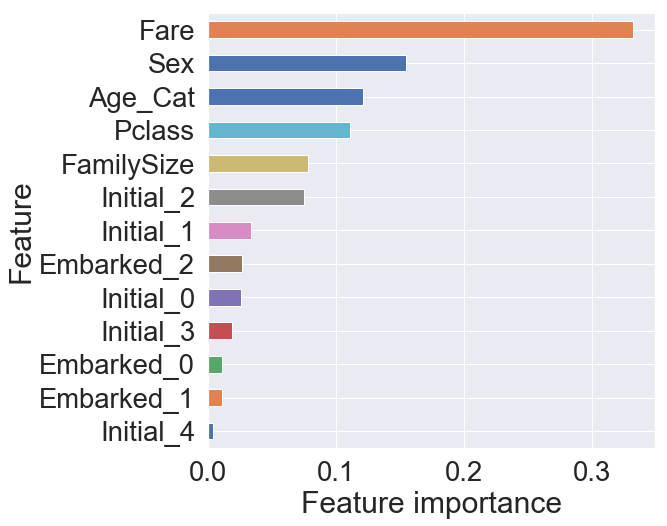

In [59]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh() # bar : 세로 막대그래프 / barh : 가로 막대 그래프
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set
- 테스트셋으로 예측해보기

In [91]:
submission = pd.read_csv('C:/python_directory/titanic/gender_submission.csv')

In [92]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
prediction=model.predict(X_test)

In [94]:
submission['Survived1'] = prediction

In [73]:
submission.head()

,PassengerId,Survived,Survived1
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,0


In [89]:
print('예측성공률 : {:.2f}%임'.format((submission['Survived']==submission['Survived1']).sum()/len(submission)))

예측성공률 : 0.81%임


In [95]:
submission.to_csv('./my_first_submission.csv', index=False) # 예측 모델 내보내기!

# 튜토리얼 끝!!!!